## Figure 2: evolution of the first three moments for different values of coalescence efficiency
https://www.essoar.org/doi/abs/10.1002/essoar.10510248.1

In [1]:
%load_ext autoreload
%autoreload

In [2]:
from matplotlib import pyplot
import numpy as np
import os 
os.environ['NUMBA_DISABLE_JIT'] = '1'

In [3]:
from PySDM_examples.Bieli_et_al_2022.settings import Settings
from PySDM_examples.Bieli_et_al_2022.simulation import make_core
from PySDM.physics import si
from atmos_cloud_sim_uj_utils import show_plot

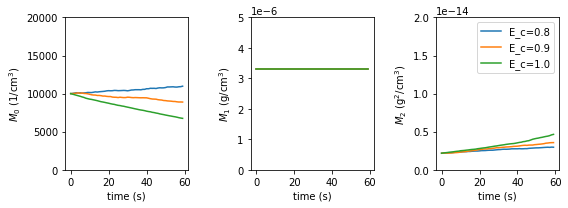

HTML(value="<a href='./fig2.pdf' target='_blank'>./fig2.pdf</a><br>")

In [4]:
settings = Settings()
fig, ax = pyplot.subplots(nrows=1, ncols=3, figsize=(8,3))
for i in range(3):
    coal_eff = settings.coal_effs[i]
    particulator = make_core(settings, coal_eff)
    t = settings.output_steps
    moments = np.zeros((3, len(t)))
    j = 0
    for step in settings.output_steps:
        particulator.run(step - particulator.n_steps)
        moments[:,j] = [particulator.products['M0'].get()[0], particulator.products['M1'].get()[0], 
            particulator.products['M2'].get()[0]]
        j += 1
    moments[1,:] *= moments[0,:]
    moments[2,:] *= moments[0,:]
    moments[1,:] *= settings.rho / si.g
    moments[2,:] *= settings.rho**2 / si.g**2
    moments *= 1/settings.dv*si.cm**3
    ax[0].plot(t, moments[0,:])
    ax[1].plot(t, moments[1,:])
    ax[2].plot(t, moments[2,:])
ax[0].set_xlabel('time (s)')
ax[1].set_xlabel('time (s)')
ax[2].set_xlabel('time (s)')
ax[0].set_ylabel('$M_0$ (1/cm$^3$)')
ax[1].set_ylabel('$M_1$ (g/cm$^3$)')
ax[2].set_ylabel('$M_2$ (g$^2$/cm$^3$)')

ax[0].set_ylim([0,2e4])
ax[1].set_ylim([0,5e-6])
ax[2].set_ylim([0,2e-14])
pyplot.legend(['E_c=0.8','E_c=0.9','E_c=1.0'])
pyplot.tight_layout()
show_plot('fig2.pdf')
